In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Load Data 

In [4]:
df = pd.read_csv('adult_reconstruction.csv')
df

,hours-per-week,age,capital-gain,capital-loss,workclass,education,education-num,marital-status,relationship,race,gender,native-country,income,occupation
0,20,40,0,0,Private,Bachelors,13,Married-civ-spouse,Wife,White,Female,United-States,49100,Tech-support
1,40,21,0,0,Private,Some-college,10,Divorced,Own-child,White,Male,United-States,11500,Craft-repair
2,10,17,0,0,Private,11th,7,Never-married,Own-child,White,Male,United-States,2600,Other-service
3,50,51,0,0,Private,HS-grad,9,Married-civ-spouse,Husband,Asian-Pac-Islander,Male,Cambodia,38997,Sales
4,38,28,0,0,Private,Bachelors,13,Never-married,Not-in-family,White,Male,?,41400,Exec-managerial
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49526,65,35,0,0,Private,Bachelors,13,Married-civ-spouse,Husband,White,Male,Yugoslavia,85080,Farming-fishing
49527,77,37,3137,0,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Husband,Asian-Pac-Islander,Male,Vietnam,34137,Sales
49528,55,24,0,0,Private,Assoc-voc,11,Never-married,Not-in-family,White,Male,United-States,13016,Sales
49529,40,24,0,0,Private,Some-college,10,Never-married,Not-in-family,White,Female,United-States,15000,Adm-clerical


# Check for Missing Values

In [5]:
df.isnull().sum()

hours-per-week    0
age               0
capital-gain      0
capital-loss      0
workclass         0
education         0
education-num     0
marital-status    0
relationship      0
race              0
gender            0
native-country    0
income            0
occupation        0
dtype: int64

#### There are some cells with ? in it, so we replace with nans and check the percentage of missing values.

In [6]:
df.isin(['?']).sum()

hours-per-week       0
age                  0
capital-gain         0
capital-loss         0
workclass         2859
education            0
education-num        0
marital-status       0
relationship         0
race                 0
gender               0
native-country     859
income               0
occupation        2869
dtype: int64

In [7]:
df['workclass'] = df['workclass'].replace('?', np.nan)
df['occupation'] = df['occupation'].replace('?', np.nan)
df['native-country'] = df['native-country'].replace('?', np.nan)


In [8]:
perc1 = df['workclass'].isnull().sum()/len(df['workclass'])*100
perc2 = df['occupation'].isnull().sum()/len(df['occupation'])*100
perc3 = df['native-country'].isnull().sum()/len(df['native-country'])*100
print("Percentage of the data missing = ", perc1,"%, in 'workclass' ", perc2,"%, in 'occupation' ", perc3,"%, in 'native-country'")


Percentage of the data missing =  5.7721426985120425 %, in 'workclass'  5.792332074862207 %, in 'occupation'  1.7342674284791342 %, in 'native-country'


In [9]:
df.dropna(how='any', inplace=True)
df.isnull().sum()

hours-per-week    0
age               0
capital-gain      0
capital-loss      0
workclass         0
education         0
education-num     0
marital-status    0
relationship      0
race              0
gender            0
native-country    0
income            0
occupation        0
dtype: int64

In [10]:
## Check if there are any duplicate rows
df.duplicated().sum()

208

In [11]:
df = df.drop_duplicates()

# Analyze Data

In [12]:
print(df.shape)
df.describe()

(45641, 14)


,hours-per-week,age,capital-gain,capital-loss,education-num,income
count,45641.000000,45641.000000,45641.000000,45641.000000,45641.00000,45641.000000
mean,40.915120,38.487566,1080.570759,87.546307,10.10438,34417.740606
std,11.966191,13.211451,7426.000706,402.596785,2.54683,26870.885616
min,1.000000,17.000000,0.000000,0.000000,1.00000,107.000000
25%,40.000000,28.000000,0.000000,0.000000,9.00000,13200.000000
50%,40.000000,37.000000,0.000000,0.000000,10.00000,27260.000000
75%,45.000000,47.000000,0.000000,0.000000,12.00000,49515.000000
max,99.000000,90.000000,99999.000000,4356.000000,16.00000,99999.000000


In [15]:
#Encode the occupations into numbers for the plot below
dictt = dict()
count = 1
for k in list(set(list(df['occupation']))):
    dictt[k]=count
    count+=1
dictt

{'Adm-clerical': 1,
 'Other-service': 2,
 'Handlers-cleaners': 3,
 'Sales': 4,
 'Priv-house-serv': 5,
 'Armed-Forces': 6,
 'Machine-op-inspct': 7,
 'Craft-repair': 8,
 'Farming-fishing': 9,
 'Protective-serv': 10,
 'Exec-managerial': 11,
 'Tech-support': 12,
 'Transport-moving': 13,
 'Prof-specialty': 14}

In [16]:
newdf = df.copy()
for d in dictt:
    newdf=newdf.replace(d, dictt[d])

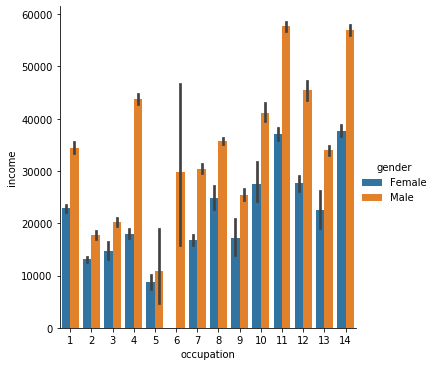

In [17]:
## EDA HERE 
## cat plot of occupation and gender
## we need to show the x label better maybe with numbers
sns.catplot(data=newdf, kind="bar", x="occupation", y="income", hue="gender")

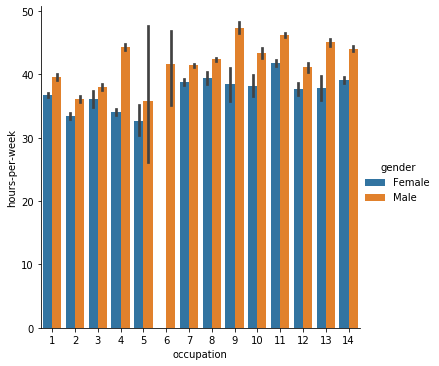

In [18]:
## cat plot of hours and gender
# We can see that men usually work more. To better visualize this, a histplot has been contstructed below
sns.catplot(data=newdf, kind="bar", x="occupation", y="hours-per-week", hue="gender")

<AxesSubplot:xlabel='income', ylabel='Count'>

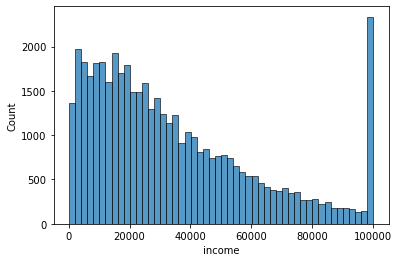

In [22]:
sns.histplot(df['income'])

<AxesSubplot:xlabel='hours-per-week', ylabel='Count'>

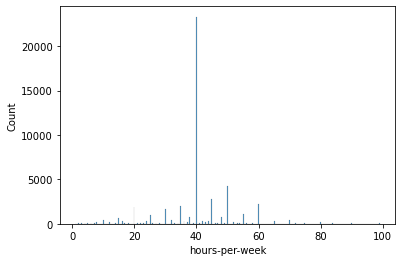

In [60]:
sns.histplot(df['hours-per-week'])
# we need to decrease the number of bins to better understand the plot

<AxesSubplot:xlabel='hours-per-week', ylabel='Count'>

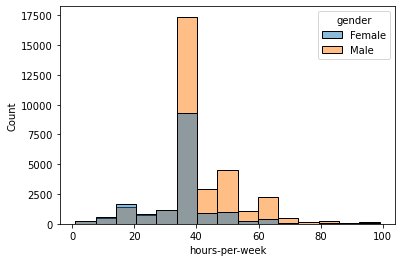

In [66]:
sns.histplot(data=df, x="hours-per-week", bins=15, hue='gender')
#Here we can see the differnece in the hours worked per week between the 2 genders
# we can also see that there are outliers that need to be removed

<AxesSubplot:xlabel='age', ylabel='Count'>

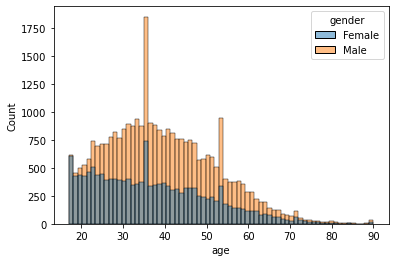

In [17]:
sns.histplot(data=df, x="age", hue="gender")

<AxesSubplot:xlabel='income', ylabel='Count'>

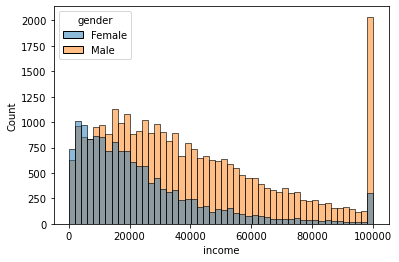

In [19]:
sns.histplot(data=df, x="income", hue="gender")

### Check for Outliers

In [68]:
### remove some extreme cases here hehe

# remove hours-per-week outliers (681 outliers)
from scipy import stats
from scipy.stats import zscore
df = df[(np.abs(stats.zscore(df['hours-per-week'])) < 3)]

<AxesSubplot:xlabel='hours-per-week', ylabel='Count'>

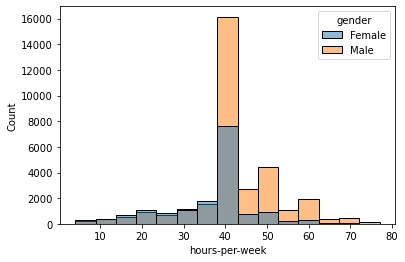

In [75]:
# plot to see how removing the outlier has affected the data
sns.histplot(data=df, x="hours-per-week", bins=15, hue='gender')

### Decode categorical data

###### Create dummy values for all categorical data

In [15]:
to_drop = ["workclass", "education", "marital-status", "relationship", "race", "native-country", "occupation", "gender"]
dummy_vars = pd.get_dummies(df[to_drop])
dfWithDummy = pd.concat([df.drop(to_drop, axis=1), dummy_vars], axis = 1)
dfWithDummy.head()

,hours-per-week,age,capital-gain,capital-loss,education-num,income,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,...,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,gender_Female,gender_Male
0,20,40,0,0,13,49100,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
1,40,21,0,0,10,11500,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,10,17,0,0,7,2600,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
3,50,51,0,0,9,38997,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
5,38,26,0,1876,13,38524,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
